In [1]:
import osmnx as ox
import pandas as pd
import numpy as np
import networkx as nx
import os
import sys
import pickle
import seaborn as sns

from matplotlib import ticker
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [2]:
ROOT_DIR = "/home/charles/Projects/QcMtlStreets"
#ROOT_DIR = "/home/dhw3172/projects/qcMtlStreets"
sys.path.append(os.path.join(ROOT_DIR, "Python"))   
os.chdir(ROOT_DIR)

In [3]:
from googleApiKey import *

In [4]:
filePathPickle=os.path.join(ROOT_DIR,"Data","Pickle", "graphElevationQc.pickle")
if os.path.isfile(filePathPickle):
    print("File exists => reading graph")
    pickle_inQc = open(filePathPickle,"rb")
    graphQcWithElevation = pickle.load(pickle_inQc)
else:
    print("File does not exists => calling google api")


File exists => reading graph


In [5]:
filePathPickleMtl=os.path.join(ROOT_DIR,"Data","Pickle", "graphElevationMtl.pickle")
if os.path.isfile(filePathPickleMtl):
    print("File exists => reading graph")
    pickle_inMtl = open(filePathPickleMtl,"rb")
    graphMtlWithElevation = pickle.load(pickle_inMtl)
else:
    print("File does not exists => calling google api")
    graphMtlWithElevation=ox.add_node_elevations(graphMtl, api_key=googleKey)
    pickle_out = open(filePathPickleMtl,"wb")
    pickle.dump(graphMtlWithElevation, pickle_out)
    pickle_out.close()

File exists => reading graph


In [6]:
qcElev=[ dat["elevation"] for node, dat in graphQcWithElevation.nodes(data=True)]
mtlElev=[ dat["elevation"] for node, dat in graphMtlWithElevation.nodes(data=True)]
maxElevQc=  np.max(qcElev)
maxElevMtl=np.max(mtlElev)
maxElev=max(maxElevQc, maxElevMtl)
print(maxElevQc, maxElevMtl, maxElev)

579.726 235.451 579.726


In [7]:
qcElev=[ dat["elevation"] for node, dat in graphQcWithElevation.nodes(data=True)]
mtlElev=[ dat["elevation"] for node, dat in graphMtlWithElevation.nodes(data=True)]
minElevQc=  np.min(qcElev)
minElevMtl=np.min(mtlElev)
minElev=min(minElevQc, minElevMtl)
print(minElevQc, minElevMtl, minElev)

-2.271 -31.611 -31.611


In [11]:
[ dat  for node, dat in graphQcWithElevation.nodes(data=True) if dat['elevation'] <= minElevQc]

[{'y': 46.8578046, 'x': -71.1722516, 'osmid': 266045138, 'elevation': -2.271}]

In [16]:
[ dat  for node, dat in graphQcWithElevation.nodes(data=True) if dat['elevation'] >= maxElevQc]

[{'y': 46.943737, 'x': -71.24828, 'osmid': 2862968537, 'elevation': 579.726}]

In [13]:
[ dat  for node, dat in graphMtlWithElevation.nodes(data=True) if dat['elevation'] <= minElevMtl]

[{'y': 45.5758962,
  'x': -73.6244992,
  'osmid': 5306479137,
  'elevation': -31.611}]

In [15]:
[ dat  for node, dat in graphMtlWithElevation.nodes(data=True) if dat['elevation'] >= maxElevMtl]

[{'y': 45.5081872,
  'x': -73.5893039,
  'osmid': 2516860720,
  'elevation': 235.451}]

In [228]:
print([(node,data) for node, data in graphQcWithElevation.nodes(data=True) if data["elevation"] == maxElevQc] , "\n",  #near station le relais
[(node,data) for node, data in graphQcWithElevation.nodes(data=True) if data["elevation"] == minElevQc]) #beauport

[(2862968537, {'y': 46.943737, 'x': -71.24828, 'osmid': 2862968537, 'elevation': 579.726})] 
 [(266045138, {'y': 46.8578046, 'x': -71.1722516, 'osmid': 266045138, 'elevation': -2.271})]


In [229]:
print([(node,data) for node, data in graphMtlWithElevation.nodes(data=True) if data["elevation"] == maxElevMtl] , "\n", #croix du mont-royal
[(node,data) for node, data in graphMtlWithElevation.nodes(data=True) if data["elevation"] == minElevMtl])  #somewhere around st-michel / st-leonard

[(2516860720, {'y': 45.5081872, 'x': -73.5893039, 'osmid': 2516860720, 'elevation': 235.451})] 
 [(5306479137, {'y': 45.5758962, 'x': -73.6244992, 'osmid': 5306479137, 'elevation': -31.611})]


In [11]:
#Create a color map with only 4 colors (minOverall, minCity, maxCity, maxOverall)
cNorm  = colors.Normalize(vmin=1, vmax=4)
scalarMap = cm.ScalarMappable(norm=cNorm, cmap=cm.plasma)
colorElev = [ scalarMap.to_rgba(i) for i in np.linspace(1,4,4)]

colorElev.append((0.8, 1, 1, 0.1)) #default  - greyish + set the alpha to very low value
colorElev

[(0.050383, 0.029803, 0.527975, 1.0),
 (0.610667, 0.090204, 0.619951, 1.0),
 (0.928329, 0.472975, 0.326067, 1.0),
 (0.940015, 0.975158, 0.131326, 1.0),
 (0.8, 1, 1, 0.1)]

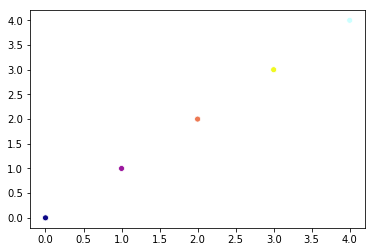

In [12]:
ax = sns.scatterplot(x=range(5),
                y=range(5),
                hue=range(5) , 
                palette={i: colorElev[i] for i in range(5)},       #this will not scale the colors 
                legend=False)

In [121]:
[ (node,dat["elevation"]) for node, dat in graphQcWithElevation.nodes(data=True) if dat["elevation"]>= maxElevQc]

[(2862968537, 579.726)]

In [122]:
[ (node,dat["elevation"]) for node, dat in graphQcWithElevation.nodes(data=True) if dat["elevation"]== maxElev]

[(2862968537, 579.726)]

In [123]:
[ (node,dat["elevation"]) for node, dat in graphMtlWithElevation.nodes(data=True) if dat["elevation"]>= maxElev]

[]

In [124]:
[ (node,dat["elevation"]) for node, dat in graphMtlWithElevation.nodes(data=True) if dat["elevation"]>= maxElevMtl]

[(2516860720, 235.451)]

In [125]:
[ (node,dat["elevation"]) for node, dat in graphQcWithElevation.nodes(data=True) if dat["elevation"]<=minElevQc]

[(266045138, -2.271)]

In [208]:
listQcElev=[ dat["elevation"] for node, dat in graphQcWithElevation.nodes(data=True) ]
listMtlElev=[ dat["elevation"] for node, dat in graphMtlWithElevation.nodes(data=True) ]


In [206]:
sorted(listQcElev)[:10]

[-2.271, -2.146, -1.981, -1.296, -1.231, -1.025, -0.934, -0.588, -0.302, 0.205]

In [207]:
sorted(listMtlElev)[:10]

[-31.611, 1.532, 4.34, 4.579, 5.757, 5.765, 5.968, 6.0, 6.0, 6.0]

In [126]:
#Parlement building
location_point=(46.808625,-71.214005) #lat, lng - weird
origin_node = ox.get_nearest_node(graphQcWithElevation, location_point)
origin_node

1911782059

In [127]:
[ dat for node, dat in graphQcWithElevation.nodes(data=True) if node == origin_node]

[{'y': 46.8089425, 'x': -71.2136303, 'osmid': 1911782059, 'elevation': 85.629}]

In [128]:
elevationParliamentHill=[ dat["elevation"] for node, dat in graphQcWithElevation.nodes(data=True) if node == origin_node][0]
elevationParliamentHill

85.629

In [129]:
def getColorCity(cmap, elev,minElev,maxElev,minElevCity,maxElevCity):
    if(elev ==  minElev):            #important to start testing for more extreme first if we want all 4 colors to appear
        c=cmap[0]
    elif (elev ==  minElevCity):
        c=cmap[1]
    elif (elev ==  maxElev):         #important to start testing for more extreme first if we want all 4 colors to appear
        c=cmap[3]
    elif (elev ==  maxElevCity):
        c=cmap[2]
    else:
        c=cmap[4]
        
    return(c)

In [130]:
def getColorQc(elev):
    return( getColorCity(colorElev, elev,minElev,maxElev,minElevQc,maxElevQc)  )

In [131]:
def getColorMtl(elev):
    return( getColorCity(colorElev, elev,minElev,maxElev,minElevMtl,maxElevMtl)  )

In [168]:
def getNodeSizeQc(elev):
    if( colorElev[4] != getColorQc(elev)):
        s=50 #this is a single point, so make sure it stands out!
    else:
        s=0 #we still have the edges
    
    return(s)

In [209]:
def getNodeSizeMtl(elev):
    if( colorElev[4] != getColorMtl(elev)):
        s=50
    else:
        s=0 #we still have the edges
    
    return(s)

In [210]:
def getColorQcGeqMaxMtl(elev):
    if(elev >=  maxElevMtl ):
        c=colorElev[3]
    else:
        c=colorElev[4]
        
    return(c)

In [211]:
def getNodeSizeQcGeqMaxMtl(elev):
    if( colorElev[4] != getColorQcGeqMaxMtl(elev)):
        s=50
    else:
        s=0
    
    return(s)

In [212]:
def getColorBelowThresh(elev,thresh=0):
    if(elev <= thresh ):
        c=colorElev[0] #min col
    else:
        c=colorElev[4]
        
    return(c)

In [213]:
def getColorAboveThresh(elev,thresh=elevationParliamentHill):
    if(elev >= thresh ):
        c=colorElev[3] #max col
    else:
        c=colorElev[4]
        
    return(c)

In [214]:
def getNodeSizeFlex(elev,colGetter):
    if( colorElev[4] == colGetter(elev)):
        s=0 #colorElev[4] is the default color
    else:
        s=12
    
    return(s)

In [176]:
[getColorBelowThresh(data["elevation"]) for n,data in graphQcWithElevation.nodes(data=True)] [:2]

[(0.8, 1, 1, 0.1), (0.8, 1, 1, 0.1)]

In [177]:
[getColorBelowThresh(data["elevation"]) for n,data in graphMtlWithElevation.nodes(data=True) if getColorBelowThresh(data["elevation"]) == (0.050383, 0.029803, 0.527975, 1.0)] 

[(0.050383, 0.029803, 0.527975, 1.0)]

In [178]:
df=pd.DataFrame( {"col": [getColorBelowSeaLevel(data["elevation"]) for n,data in graphQcWithElevation.nodes(data=True)] })
df["index"] = [i for i in range(df.shape[0])]
df.head()

df.groupby("col").count()

index
col                                       
(0.050383, 0.029803, 0.527975, 1.0)      9
(0.8, 1, 1, 0.1)                     98555

In [179]:
threshWater=1.2 #currently projected - 0.3 - 1.2 m https://en.wikipedia.org/wiki/Sea_level_rise
df=pd.DataFrame( {"col": [getColorBelowThresh(data["elevation"],threshWater) for n,data in graphQcWithElevation.nodes(data=True)] })
df["index"] = [i for i in range(df.shape[0])]
df.head()

df.groupby("col").count() 

index
col                                       
(0.050383, 0.029803, 0.527975, 1.0)     15
(0.8, 1, 1, 0.1)                     98549

In [180]:
df=pd.DataFrame( {"col": [getColorBelowThresh(data["elevation"]) for n,data in graphMtlWithElevation.nodes(data=True)] })
df["index"] = [i for i in range(df.shape[0])]
df.head()

df.groupby("col").count()

index
col                                        
(0.050383, 0.029803, 0.527975, 1.0)       1
(0.8, 1, 1, 0.1)                     122165

In [181]:
df=pd.DataFrame( {"col": [getColorBelowThresh(data["elevation"],threshWater) for n,data in graphMtlWithElevation.nodes(data=True)] })
df["index"] = [i for i in range(df.shape[0])]
df.head()

df.groupby("col").count()

index
col                                        
(0.050383, 0.029803, 0.527975, 1.0)       1
(0.8, 1, 1, 0.1)                     122165

In [182]:
print( getNodeSizeQc(578), getNodeSizeQc(579.726) , getNodeSizeMtl(235.451) ,getNodeSizeQc(235.451) )

0 50 50 0


In [183]:
print(getColorBelowSeaLevel(-2.1))

(0.050383, 0.029803, 0.527975, 1.0)


In [184]:
print(getColorMtl(235.451) != colorElev[2], getColorQc(235.451) != colorElev[2] )

False True


In [185]:
getColorCity(colorElev,
            58,
            minElev,
            maxElev,
            minElevMtl,
            maxElevMtl)

(0.8, 1, 1, 0.1)

In [186]:
getColorMtl(58)

(0.8, 1, 1, 0.1)

In [187]:
getColorCity(colorElev,
            maxElevMtl,
            minElev,
            maxElev,
            minElevMtl,
            maxElevMtl)

(0.928329, 0.472975, 0.326067, 1.0)

In [188]:
getColorMtl(maxElevMtl)

(0.928329, 0.472975, 0.326067, 1.0)

In [189]:
getColorMtl(maxElev)

(0.940015, 0.975158, 0.131326, 1.0)

In [215]:
listQcColors= [ getColorQc(data["elevation"])  for n,data in graphQcWithElevation.nodes(data=True)]
listMtlColors= [ getColorMtl(data["elevation"])  for n,data in graphMtlWithElevation.nodes(data=True)]

listQcColorsGeqMaxMtl= [ getColorQcGeqMaxMtl(data["elevation"])  for n,data in graphQcWithElevation.nodes(data=True)]

listQcColorsBelowSea= [ getColorBelowThresh(data["elevation"])  for n,data in graphQcWithElevation.nodes(data=True)]
listMtlColorsBelowSea= [ getColorBelowThresh(data["elevation"])  for n,data in graphMtlWithElevation.nodes(data=True)]

listQcColorsAboveParliament= [ getColorAboveThresh(data["elevation"])  for n,data in graphQcWithElevation.nodes(data=True)]
listMtlColorsAboveParliament= [ getColorAboveThresh(data["elevation"])  for n,data in graphMtlWithElevation.nodes(data=True)]



In [216]:
listQcSizes= [ getNodeSizeQc(data["elevation"])  for n,data in graphQcWithElevation.nodes(data=True)]
listMtlSizes= [ getNodeSizeMtl(data["elevation"])  for n,data in graphMtlWithElevation.nodes(data=True)]

listQcGeqMaxMtlSizes= [ getNodeSizeQcGeqMaxMtl(data["elevation"])  for n,data in graphQcWithElevation.nodes(data=True)]

listQcSeaSize= [getNodeSizeFlex (data["elevation"], getColorBelowThresh) for n,data in graphQcWithElevation.nodes(data=True)]
listMtlSeaSize= [ getNodeSizeFlex (data["elevation"], getColorBelowThresh) for n,data in graphMtlWithElevation.nodes(data=True)]

listQcAboveParliamentSize= [ getNodeSizeFlex (data["elevation"], getColorAboveThresh) for n,data in graphQcWithElevation.nodes(data=True)]
listMtlAboveParliamentSize= [ getNodeSizeFlex (data["elevation"], getColorAboveThresh) for n,data in graphMtlWithElevation.nodes(data=True)]



In [221]:
print( len([ l for l in listMtlAboveParliamentSize if l > 0]), len([ l for l in listQcAboveParliamentSize if l > 0]))

8292 42148


In [222]:
print(len([ l for l in listMtlSeaSize if l > 0] ) ,len([ l for l in listQcSeaSize if l > 0] ) )

1 9


In [108]:
print(set(listQcColors) , "\n", set(listQcSizes) )

{(0.940015, 0.975158, 0.131326, 1.0), (0.610667, 0.090204, 0.619951, 1.0), (0.8, 1, 1, 0.1)} 
 {0, 50}


In [109]:
print(set(listMtlColors) , "\n", set(listMtlSizes) )

{(0.050383, 0.029803, 0.527975, 1.0), (0.928329, 0.472975, 0.326067, 1.0), (0.8, 1, 1, 0.1)} 
 {0, 50}


In [110]:
listQcColors[:2]

[(0.8, 1, 1, 0.1), (0.8, 1, 1, 0.1)]

In [111]:
listMtlColors[:2]

[(0.8, 1, 1, 0.1), (0.8, 1, 1, 0.1)]

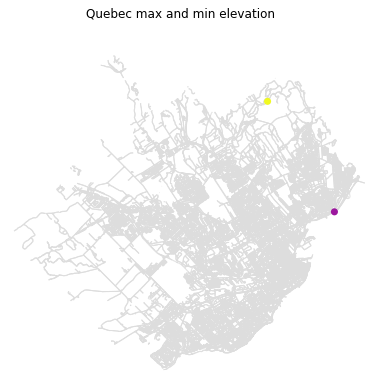

In [112]:
 

fig, ax = ox.plot_graph(graphQcWithElevation, 
                        fig_height=6, 
                        node_color=listQcColors, 
                        node_size=listQcSizes, 
                        node_zorder=3, 
                        edge_color='#dddddd',
                        close=False,
                        show=False
                       )

fig.suptitle("Quebec max and min elevation")


fig = ax.get_figure()
fig.savefig(os.path.join(ROOT_DIR,"Figures","QcMaxMinElevationMaps.png"))

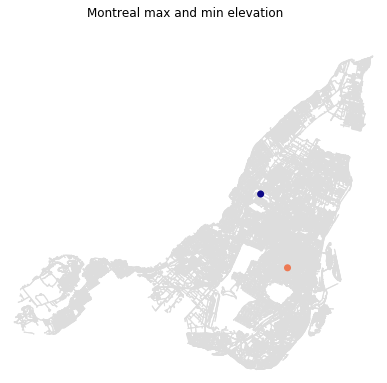

In [282]:
fig, ax = ox.plot_graph( graphMtlWithElevation , 
                        fig_height=6, 
                        node_color=listMtlColors, 
                        node_size=listMtlSizes, 
                        node_zorder=3,  #plot nodes above edges
                        edge_color='#dddddd',
                        close=False,
                        show=False
                       )
fig.suptitle("Montreal max and min elevation")

fig = ax.get_figure()
fig.savefig(os.path.join(ROOT_DIR,"Figures","MtlMaxMinElevationMaps.png"))

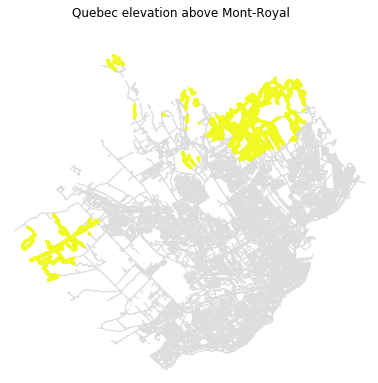

In [283]:
fig, ax = ox.plot_graph(graphQcWithElevation, 
                        fig_height=6, 
                        node_color=listQcColorsGeqMaxMtl, 
                        node_size=listQcGeqMaxMtlSizes, 
                        node_zorder=2, 
                        edge_color='#dddddd',
                        close=False,
                        show=False
                       )

fig.suptitle("Quebec elevation above Mont-Royal")


fig = ax.get_figure()
fig.savefig(os.path.join(ROOT_DIR,"Figures","QcElevationGeqMaxMtl.png"))

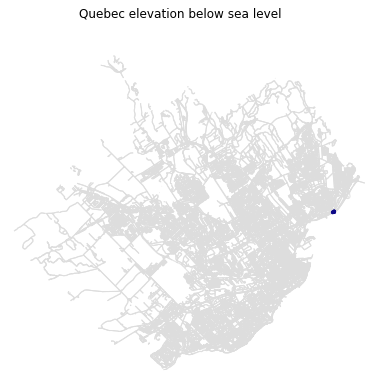

In [156]:
fig, ax = ox.plot_graph(graphQcWithElevation, 
                        fig_height=6, 
                        node_color=listQcColorsBelowSea, 
                        node_size=listQcSeaSize, #12, 
                        node_zorder=2, 
                        edge_color='#dddddd',
                        close=False,
                        show=False
                       )

fig.suptitle("Quebec elevation below sea level")


fig = ax.get_figure()
fig.savefig(os.path.join(ROOT_DIR,"Figures","QcElevationBelowSea.png"))

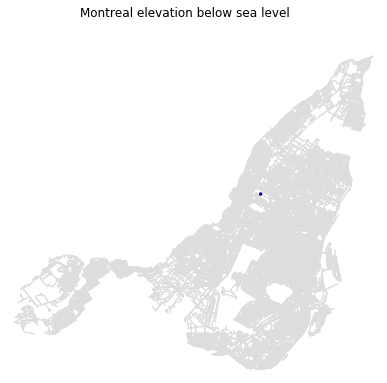

In [223]:
fig, ax = ox.plot_graph(graphMtlWithElevation, 
                        fig_height=6, 
                        node_color=listMtlColorsBelowSea, 
                        node_size=listMtlSeaSize, #12, 
                        node_zorder=2, 
                        edge_color='#dddddd',
                        close=False,
                        show=False
                       )

fig.suptitle("Montreal elevation below sea level")


fig = ax.get_figure()
fig.savefig(os.path.join(ROOT_DIR,"Figures","MtlElevationBelowSea.png"))

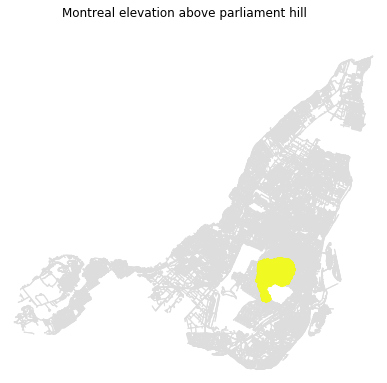

In [158]:
fig, ax = ox.plot_graph(graphMtlWithElevation, 
                        fig_height=6, 
                        node_color=listMtlColorsAboveParliament, 
                        node_size=listMtlAboveParliamentSize, #12, 
                        node_zorder=2, 
                        edge_color='#dddddd',
                        close=False,
                        show=False
                       )

fig.suptitle("Montreal elevation above parliament hill")


fig = ax.get_figure()
fig.savefig(os.path.join(ROOT_DIR,"Figures","MtlElevationAboveHill.png"))